- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
 - Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
df = pd.read_csv('Company_Data.csv')

# EDA

In [50]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [51]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [52]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

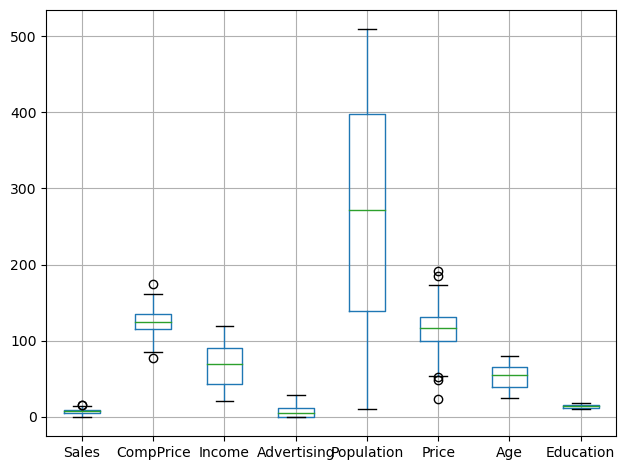

In [53]:
df.boxplot()
plt.tight_layout()

# OrdinalEncoding For feature Column

In [54]:
od = OrdinalEncoder()
df[['ShelveLoc']] = od.fit_transform(df[['ShelveLoc']])
df[['Urban']] = od.fit_transform(df[['Urban']])
df[['US']] = od.fit_transform(df[['US']])

In [55]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


# Create Target Column

In [56]:
Target = []
for x in df['Sales']:
    if x <= 7.49:
        Target.append("bad")
    else:
        Target.append('good')
df['Target'] = Target
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0,good
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0,good
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0,good
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0,bad
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0,good
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0,bad
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0,bad
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0,bad


In [57]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [58]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0,1
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0,1
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0,1
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0,0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0,1
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0,0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0,0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0,0


# Model Building
- Random Forest

In [59]:
x = df.drop(axis =1,columns={'Sales','Target'})
y = df['Target']

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.79      0.78      0.78        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [64]:
print(rf.score(xtrain,ytrain))
rf.score(xtest,ytest)

1.0


0.7875

# Hyperparameter Tuning
- find best parameter Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3,4,5,6,7,8,9],
    'max_leaf_nodes': [3,4,5,6,7,8,9,10],
}

In [67]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [68]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]})

In [69]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 10,
 'n_estimators': 40}

# Final Model

In [70]:
rf = RandomForestClassifier(n_estimators=40,max_depth=7,max_features=None,max_leaf_nodes=10)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        40
           1       0.79      0.75      0.77        40

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



In [72]:
print(rf.score(xtrain,ytrain))
rf.score(xtest,ytest)

0.90625


0.775